In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data=data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [ ]:
#df.loc[[2,4,7],['animal','age']]
df[['animal','age']].iloc[[2,4,8]]

,animal,age
c,snake,0.5
e,dog,5.0
i,dog,7.0


In [ ]:
df[df['visits'] >= 3 ]

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


In [ ]:
df[df['age'].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [ ]:
df[(df['animal']=="cat")&(df['age'] <= 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [ ]:
df.loc['f',"age"]=1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [ ]:
np.sum(df['visits'])

19

In [ ]:
df.groupby('animal')['age'].mean()


,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


In [ ]:
df.drop('k',inplace=True)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [ ]:
df.groupby('animal')['animal'].count()
#df['animal'].value_counts()

,animal
animal,
cat,4
dog,4
snake,2


In [ ]:
df.sort_values(['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,False
e,dog,5.0,2,False
g,python,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,2.0,3,False
c,python,0.5,2,False
h,cat,NaN,1,True
d,dog,NaN,3,True


In [ ]:
df['priority'] = df['priority'].map({"yes":True , "no":False} )
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 630.0+ bytes


In [ ]:
df['animal'] = df['animal'].replace({'snake':'python'})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [ ]:
df.groupby(['animal','visits'])['age'].mean()
#df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

animal  visits
cat     1         2.5
        3         2.5
dog     1         3.0
        2         6.0
        3         NaN
python  1         4.5
        2         0.5
Name: age, dtype: float64

In [ ]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
#df.drop_duplicates(subset='A')
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df.sub(df.mean(axis=1),axis=0)

,0,1,2
0,-0.117195,0.051981,0.065213
1,0.309438,0.095178,-0.404616
2,-0.299912,0.318430,-0.018518
3,-0.012871,-0.014800,0.027671
4,0.401675,0.059028,-0.460703


In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df.sum().idxmin()

'g'

In [ ]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
print(df)
len(df)-df.duplicated().sum()

   0  1  2
0  1  0  0
1  1  0  0
2  0  0  0
3  1  1  1
4  1  0  1
5  1  0  1
6  1  0  0
7  0  0  1
8  1  0  0
9  0  0  1


5

In [ ]:
nan = np.nan
data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')
df = pd.DataFrame(data, columns=columns)
print(df.isnull())
(df.isnull().cumsum(axis=1)==3).idxmax(axis=True)

       a     b      c      d      e      f      g      h      i      j
0  False  True   True  False   True  False  False  False   True   True
1   True  True   True  False  False   True   True  False  False  False
2   True  True  False   True  False  False   True   True  False  False
3  False  True   True  False  False  False  False   True   True   True
4   True  True  False   True  False   True  False   True  False  False


,0
0,e
1,c
2,d
3,h
4,d


In [ ]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])
df.cut(df['A'],npp.arange(1,101,10))


,A,B
0,46,29
1,75,22
2,49,63
3,33,43
4,71,75
...,...,...
95,60,87
96,57,40
97,86,19
98,50,56


# **problem**

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'Age': [25, 32, 29, 40, 22, 35, 28, 41, 33, 26],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'Austin'],
    'Job Title': ['Engineer', 'Data Scientist', 'Designer', 'Manager', 'Intern', 'Engineer', 'Data Scientist', 'Manager', 'Designer', 'Intern']
}

df = pd.DataFrame(data)
df

,Name,Age,City,Job Title
0,Alice,25,New York,Engineer
1,Bob,32,Los Angeles,Data Scientist
2,Charlie,29,Chicago,Designer
3,David,40,Houston,Manager
4,Eva,22,Phoenix,Intern
5,Frank,35,Philadelphia,Engineer
6,Grace,28,San Antonio,Data Scientist
7,Hannah,41,San Diego,Manager
8,Ivy,33,Dallas,Designer
9,Jack,26,Austin,Intern


In [ ]:
df.head()

,Name,Age,City,Job Title
0,Alice,25,New York,Engineer
1,Bob,32,Los Angeles,Data Scientist
2,Charlie,29,Chicago,Designer
3,David,40,Houston,Manager
4,Eva,22,Phoenix,Intern


In [ ]:
df[df['Age']>30]

,Name,Age,City,Job Title
1,Bob,32,Los Angeles,Data Scientist
3,David,40,Houston,Manager
5,Frank,35,Philadelphia,Engineer
7,Hannah,41,San Diego,Manager
8,Ivy,33,Dallas,Designer


In [ ]:
df['City']

,City
0,New York
1,Los Angeles
2,Chicago
3,Houston
4,Phoenix
5,Philadelphia
6,San Antonio
7,San Diego
8,Dallas
9,Austin


In [ ]:
meanAge=df['Age'].mean()
df['Age']=df['Age'].fillna(meanAge)
df

,Name,Age,City,Job Title
0,Alice,25,New York,Engineer
1,Bob,32,Los Angeles,Data Scientist
2,Charlie,29,Chicago,Designer
3,David,40,Houston,Manager
4,Eva,22,Phoenix,Intern
5,Frank,35,Philadelphia,Engineer
6,Grace,28,San Antonio,Data Scientist
7,Hannah,41,San Diego,Manager
8,Ivy,33,Dallas,Designer
9,Jack,26,Austin,Intern


In [ ]:
df.groupby('City')['Age'].mean()

,Age
City,
Austin,26.0
Chicago,29.0
Dallas,33.0
Houston,40.0
Los Angeles,32.0
New York,25.0
Philadelphia,35.0
Phoenix,22.0
San Antonio,28.0


In [ ]:
df.sort_values(by='Age',ascending=False)

,Name,Age,City,Job Title
7,Hannah,41,San Diego,Manager
3,David,40,Houston,Manager
5,Frank,35,Philadelphia,Engineer
8,Ivy,33,Dallas,Designer
1,Bob,32,Los Angeles,Data Scientist
2,Charlie,29,Chicago,Designer
6,Grace,28,San Antonio,Data Scientist
9,Jack,26,Austin,Intern
0,Alice,25,New York,Engineer
4,Eva,22,Phoenix,Intern


In [ ]:
df['age_category'] = df['Age'].apply(lambda x: 'Young' if x < 30 else 'Old')
df

,Name,Age,City,Job Title,age_category
0,Alice,25,New York,Engineer,Young
1,Bob,32,Los Angeles,Data Scientist,Old
2,Charlie,29,Chicago,Designer,Young
3,David,40,Houston,Manager,Old
4,Eva,22,Phoenix,Intern,Young
5,Frank,35,Philadelphia,Engineer,Old
6,Grace,28,San Antonio,Data Scientist,Young
7,Hannah,41,San Diego,Manager,Old
8,Ivy,33,Dallas,Designer,Old
9,Jack,26,Austin,Intern,Young


<Axes: xlabel='Job Title'>

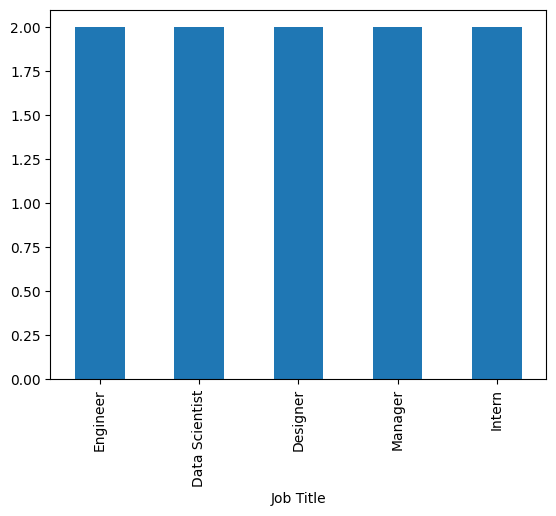

In [ ]:
df['Job Title'].value_counts().plot(kind='bar')

In [ ]:
city_data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'Austin'],
    'Population': [8419600, 3980400, 2716000, 2328000, 1690000, 1584200, 1511940, 1423851, 1348000, 964254],
    'Area (sq km)': [789, 1302, 589, 1625, 1340, 347, 465, 372, 882, 437]
}
df_city_info = pd.DataFrame(city_data)

df_merged = pd.merge(df, df_city_info, on='City')
df_merged

,Name,Age,City,Job Title,age_category,Population,Area (sq km)
0,Alice,25,New York,Engineer,Young,8419600,789
1,Bob,32,Los Angeles,Data Scientist,Old,3980400,1302
2,Charlie,29,Chicago,Designer,Young,2716000,589
3,David,40,Houston,Manager,Old,2328000,1625
4,Eva,22,Phoenix,Intern,Young,1690000,1340
5,Frank,35,Philadelphia,Engineer,Old,1584200,347
6,Grace,28,San Antonio,Data Scientist,Young,1511940,465
7,Hannah,41,San Diego,Manager,Old,1423851,372
8,Ivy,33,Dallas,Designer,Old,1348000,882
9,Jack,26,Austin,Intern,Young,964254,437


In [ ]:
df[(df['Job Title'] == 'Engineer') | (df['Job Title'] == 'Data Scientist')]

,Name,Age,City,Job Title,age_category
0,Alice,25,New York,Engineer,Young
1,Bob,32,Los Angeles,Data Scientist,Old
5,Frank,35,Philadelphia,Engineer,Old
6,Grace,28,San Antonio,Data Scientist,Young


In [ ]:
df['Job Title']=df['Job Title'].replace({'Intern':'Junior'})
df

,Name,Age,City,Job Title,age_category
0,Alice,25,New York,Engineer,Young
1,Bob,32,Los Angeles,Data Scientist,Old
2,Charlie,29,Chicago,Designer,Young
3,David,40,Houston,Manager,Old
4,Eva,22,Phoenix,Junior,Young
5,Frank,35,Philadelphia,Engineer,Old
6,Grace,28,San Antonio,Data Scientist,Young
7,Hannah,41,San Diego,Manager,Old
8,Ivy,33,Dallas,Designer,Old
9,Jack,26,Austin,Junior,Young


In [ ]:
df['Age_group']=df['Age'].apply(lambda x: 'Young' if (x >= 18) and (x<=25)  else ('Middle-Aged' if (x>=26) & (x<=40) else 'Old')  )
df

,Name,Age,City,Job Title,age_category,Age_group
0,Alice,25,New York,Engineer,Young,Young
1,Bob,32,Los Angeles,Data Scientist,Old,Middle-Aged
2,Charlie,29,Chicago,Designer,Young,Middle-Aged
3,David,40,Houston,Manager,Old,Middle-Aged
4,Eva,22,Phoenix,Junior,Young,Young
5,Frank,35,Philadelphia,Engineer,Old,Middle-Aged
6,Grace,28,San Antonio,Data Scientist,Young,Middle-Aged
7,Hannah,41,San Diego,Manager,Old,Old
8,Ivy,33,Dallas,Designer,Old,Middle-Aged
9,Jack,26,Austin,Junior,Young,Middle-Aged


In [ ]:
df.pivot_table(index='Job Title',values='Age',aggfunc='mean')

,Age
Job Title,
Data Scientist,30.0
Designer,31.0
Engineer,30.0
Junior,24.0
Manager,40.5


In [ ]:
df.pivot_table(index=['Job Title','City'],values='Name',aggfunc='count')
df.pivot_table(index=['Job Title','City'],aggfunc='size')

Job Title       City        
Data Scientist  Los Angeles     1
                San Antonio     1
Designer        Chicago         1
                Dallas          1
Engineer        New York        1
                Philadelphia    1
Junior          Austin          1
                Phoenix         1
Manager         Houston         1
                San Diego       1
dtype: int64

In [ ]:
data2 = {
    'Name': ['Laura', 'Mike', 'Nina', 'Oliver', 'Paul', 'Quincy', 'Rachel', 'Sophie', 'Tom', 'Uma'],
    'Age': [30, 37, 24, 45, 26, 33, 27, 40, 32, 28],
    'City': ['Miami', 'Seattle', 'Boston', 'Dallas', 'Atlanta', 'Denver', 'Chicago', 'Orlando', 'Las Vegas', 'Portland'],
    'Job Title': ['Manager', 'Data Scientist', 'Engineer', 'Designer', 'Intern', 'Data Scientist', 'Manager', 'Intern', 'Engineer', 'Designer']
}

df2 = pd.DataFrame(data2)
df2



,Name,Age,City,Job Title
0,Laura,30,Miami,Manager
1,Mike,37,Seattle,Data Scientist
2,Nina,24,Boston,Engineer
3,Oliver,45,Dallas,Designer
4,Paul,26,Atlanta,Intern
5,Quincy,33,Denver,Data Scientist
6,Rachel,27,Chicago,Manager
7,Sophie,40,Orlando,Intern
8,Tom,32,Las Vegas,Engineer
9,Uma,28,Portland,Designer


In [ ]:
new_df=pd.concat([df,df2],axis=0).reset_index(drop=True)
new_df

,Name,Age,City,Job Title,age_category,Age_group
0,Alice,25,New York,Engineer,Young,Young
1,Bob,32,Los Angeles,Data Scientist,Old,Middle-Aged
2,Charlie,29,Chicago,Designer,Young,Middle-Aged
3,David,40,Houston,Manager,Old,Middle-Aged
4,Eva,22,Phoenix,Junior,Young,Young
5,Frank,35,Philadelphia,Engineer,Old,Middle-Aged
6,Grace,28,San Antonio,Data Scientist,Young,Middle-Aged
7,Hannah,41,San Diego,Manager,Old,Old
8,Ivy,33,Dallas,Designer,Old,Middle-Aged
9,Jack,26,Austin,Junior,Young,Middle-Aged


In [ ]:
data3 = {
    'Country': ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA',
                'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
    'Department': ['Engineering', 'AI', 'Design', 'Marketing', 'HR', 'Finance', 'Engineering', 'Design', 'Marketing', 'HR',
                   'AI', 'Finance', 'Design', 'Engineering', 'Marketing', 'HR', 'AI', 'Finance', 'HR', 'AI']
}

df3 = pd.DataFrame(data3)

new_df=pd.concat([new_df,df3],axis=1)
new_df

,Name,Age,City,Job Title,age_category,Age_group,Country,Department
0,Alice,25,New York,Engineer,Young,Young,USA,Engineering
1,Bob,32,Los Angeles,Data Scientist,Old,Middle-Aged,USA,AI
2,Charlie,29,Chicago,Designer,Young,Middle-Aged,USA,Design
3,David,40,Houston,Manager,Old,Middle-Aged,USA,Marketing
4,Eva,22,Phoenix,Junior,Young,Young,USA,HR
5,Frank,35,Philadelphia,Engineer,Old,Middle-Aged,USA,Finance
6,Grace,28,San Antonio,Data Scientist,Young,Middle-Aged,USA,Engineering
7,Hannah,41,San Diego,Manager,Old,Old,USA,Design
8,Ivy,33,Dallas,Designer,Old,Middle-Aged,USA,Marketing
9,Jack,26,Austin,Junior,Young,Middle-Aged,USA,HR


In [ ]:
df_no_duplicates = df.drop_duplicates(subset=['Name', 'City'])


# **Data Cleaning**

In [ ]:
df=pd.read_excel("/Customer Call List.xlsx") # can find it on downloads in my computer , or D:\MEHDI\Coding\Python\pandasTutorial\Data
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [ ]:
df.drop_duplicates(inplace=True)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [ ]:
df.drop(columns = "Not_Useful_Column" , inplace=True)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [ ]:
#regular expression
param = r"(^[(/|...)+])|([(_)+]$)"
df["Last_Name"].replace(param,"",regex=True,inplace=True)
df

<ipython-input-141-ca7a4475b538>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Last_Name"].replace(param,"",regex=True,inplace=True)


,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [ ]:
param = r"[^0-9]" #everything other than 0-9
df['Phone_Number'].replace(param,'',regex=True,inplace=True)
df

<ipython-input-142-4b809d6b77e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phone_Number'].replace(param,'',regex=True,inplace=True)


,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,1235455421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,1236439775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,1235432345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,3047622467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,1235455421,"25th Main Street, New York",Yes,No


In [ ]:
df['Phone_Number'] = df['Phone_Number'].apply(lambda x : str(x) )
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: x[0:3]+"-"+x[3:6]+"-"+x[6:])
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,No,Yes
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,nan--,1209 South Street,No,No
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,--,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [ ]:
param = r'((n|N)an)*(-){2,}'
df['Phone_Number']= df['Phone_Number'].replace(param,'',regex=True)

df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,No,Yes
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,,1209 South Street,No,No
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [ ]:
addr=df['Address'].str.split(",",expand=True)
#print(addr[:][0])
df["Details"] , df["City"] , df["Post_Code"]  = addr[:][0] , addr[:][1] ,addr[:][2]
df.drop(columns='Address')

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Details,City,Post_Code
0,1001,Frodo,Baggins,123-545-5421,Yes,No,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,123-643-9775,No,Yes,93 West Main Street,None,None
2,1003,Walter,White,706-695-0392,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,123-543-2345,Yes,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,876-678-3469,Y,No,123 Dragons Road,None,None
5,1006,Ron,Swanson,304-762-2467,Yes,Yes,768 City Parkway,None,None
6,1007,Jeff,Winger,,No,No,1209 South Street,None,None
7,1008,Sherlock,Holmes,876-678-3469,N,No,98 Clue Drive,None,None
8,1009,Gandalf,NaN,,Yes,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,123-545-5421,Yes,No,25th Main Street,New York,None


In [ ]:
df['Paying Customer'] = df['Paying Customer'].apply(
    lambda x :
      True if x.lower() in ("Yes".lower() , "Y".lower()) else False
    )
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Details,City,Post_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",True,No,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,False,Yes,93 West Main Street,None,None
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,False,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",True,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,True,No,123 Dragons Road,None,None
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,True,Yes,768 City Parkway,None,None
6,1007,Jeff,Winger,,1209 South Street,False,No,1209 South Street,None,None
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,False,No,98 Clue Drive,None,None
8,1009,Gandalf,NaN,,123 Middle Earth,True,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",True,No,25th Main Street,New York,None


In [ ]:
df['Do_Not_Contact'] = df['Do_Not_Contact'].apply(
    lambda x : str(x)
    )
df
df['Do_Not_Contact'] = df['Do_Not_Contact'].apply(
    lambda x :
      True if x.lower() in ("Yes".lower() , "Y".lower()) else False
    )
df


,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Details,City,Post_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",True,False,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,False,True,93 West Main Street,None,None
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,False,False,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",True,True,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,True,False,123 Dragons Road,None,None
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,True,True,768 City Parkway,None,None
6,1007,Jeff,Winger,,1209 South Street,False,False,1209 South Street,None,None
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,False,False,98 Clue Drive,None,None
8,1009,Gandalf,NaN,,123 Middle Earth,True,False,123 Middle Earth,None,None
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",True,False,25th Main Street,New York,None


In [ ]:
notcalled = np.where(((df['Do_Not_Contact']==True) & (df['Phone_Number']!=''))|(df['Phone_Number']==''))
print(notcalled[0])
df.drop(index=notcalled[0],inplace=True)
df


[ 1  3  5  6  8 10 18]


,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Details,City,Post_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",True,False,123 Shire Lane,Shire,None
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,False,False,298 Drugs Driveway,None,None
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,True,False,123 Dragons Road,None,None
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,False,False,98 Clue Drive,None,None
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",True,False,25th Main Street,New York,None
11,1012,Harry,..Potter,706-695-0392,2394 Hogwarts Avenue,True,False,2394 Hogwarts Avenue,None,None
12,1013,Don,Draper,123-543-2345,2039 Main Street,True,False,2039 Main Street,None,None
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,True,False,343 City Parkway,None,None
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,False,False,214 HR Avenue,None,None
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,False,False,2395 Hogwarts Avenue,None,None


In [ ]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Details,City,Post_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",True,False,123 Shire Lane,Shire,None
1,1003,Walter,White,706-695-0392,298 Drugs Driveway,False,False,298 Drugs Driveway,None,None
2,1005,Jon,Snow,876-678-3469,123 Dragons Road,True,False,123 Dragons Road,None,None
3,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,False,False,98 Clue Drive,None,None
4,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",True,False,25th Main Street,New York,None
5,1012,Harry,..Potter,706-695-0392,2394 Hogwarts Avenue,True,False,2394 Hogwarts Avenue,None,None
6,1013,Don,Draper,123-543-2345,2039 Main Street,True,False,2039 Main Street,None,None
7,1014,Leslie,Knope,876-678-3469,343 City Parkway,True,False,343 City Parkway,None,None
8,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,False,False,214 HR Avenue,None,None
9,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,False,False,2395 Hogwarts Avenue,None,None


Phone_Number
123    5
876    4
706    3
304    1
Name: count, dtype: int64


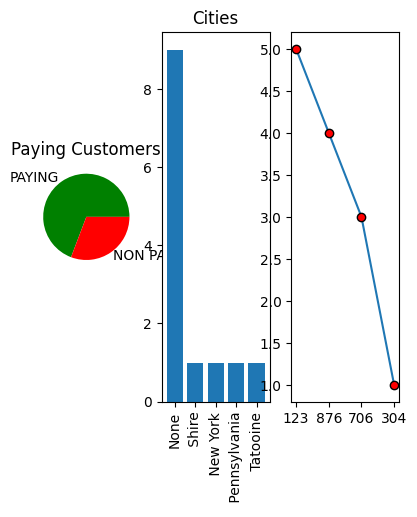

In [ ]:
plt.figure()
#print(df['Paying Customer'].unique())
#print(df['Paying Customer'].value_counts())
plt.subplot(1,4,1)
plt.pie(df['Paying Customer'].value_counts() , labels=['PAYING' , 'NON PAYING'] , colors=['green','red'])
plt.title("Paying Customers")

plt.subplot(1,4,2)
df['City']=df['City'].apply(lambda x: str(x))
#print(df['City'].value_counts())
#plt.pie(df['City'].value_counts(),labels=df['City'].value_counts().index)
plt.bar(df['City'].value_counts().index,df['City'].value_counts())
plt.xticks(rotation=90)
plt.title("Cities")

plt.subplot(1,4,3)
xxx = df['Phone_Number'].str[:3]
xxx = xxx.value_counts()
print(xxx)
plt.plot(xxx.index,xxx , marker='o' , mfc='r' , mec='k')

plt.show()

# **3rd Project**

In [ ]:
df = pd.read_csv('/content/TWO_CENTURIES_OF_UM_RACES.csv') # in D:\MEHDI\Coding\Python\pandasTutorial\Data\someData
print(df.shape)
df

(18660, 13)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,2018,17.03.2018,Dalat Ultra Trail (VIE),70km,135,12:31:51 h,NaN,ROU,1984.0,M,M23,5.586,17896.0
18656,2018,17.03.2018,Dalat Ultra Trail (VIE),70km,135,12:33:08 h,NaN,VIE,1986.0,M,M23,5.577,17897.0
18657,2018,17.03.2018,Dalat Ultra Trail (VIE),70km,135,12:33:28 h,NaN,SGP,1973.0,M,M40,5.574,17898.0
18658,2018,17.03.2018,Dalat Ultra Trail (VIE),70km,135,12:33:45 h,NaN,FRA,NaN,M,NaN,5.572,17899.0


In [ ]:
df.shape

(18660, 13)

In [ ]:
 df.columns
 print(df['Event name'].unique()) #only USA)
 print(df['Event distance/length'].unique()) #50km or 50mil
 print(df['Year of event'].unique()) # only  2020

['Selva Costera (CHI)'
 '6 Stunden Self-Transcendence Sri Chinmoy Smolensk (RUS)'
 'Knap Trail - Forhajerska (SLO)'
 'Yankee Springs 50 Mile Winter Challenge (USA)'
 'Yankee Springs 50 km Winter Challenge (USA)'
 'La Cuesta Ranch Trail Run (USA)' 'Frozen Sasquatch 50K Trail Race (USA)'
 'Watchung Winter 50 km Run (USA)'
 '24 Stunden Self-Transcendence Sri Chinmoy Smolensk (RUS)'
 'Duinhopper 201km (NED)' 'Duinhopper Kidsrun 102km (NED)'
 'S1 Ultra (ITA)'
 '12 Stunden Self-Transcendence Sri Chinmoy Smolensk (RUS)'
 'Flaming Mountain Ultra Run (TPE)' 'Sandman 50 (AUS)'
 'Hardmoors 30 (GBR)' 'The First Walk - 50km (HKG)' 'Red Eye 50km (USA)'
 'Wujhihshan Ultra Run (TPE)' 'Shenzhen Wutong New Year Trail (CHN)'
 'Bayu Twelve Peaks Nanshan Trail (CHN)' 'The Silkin Way Ultra (GBR)'
 'Pfälzer Berglandtrail Etappe 2 Wolfstein-Potzberg-Wolfstein (GER)'
 'FélBalaton Supermarathon (HUN)'
 'Ultra Maratón des las Altas Montanas (UMAM) 80 Kms (MEX)'
 'Ultra Maratón des las Altas Montanas (UMAM) 55 Km

In [ ]:
#Only 50km and 50Miles

#print(df['Event distance/length'].str.lower().unique())

param = r'^(?!50(km|mi)$).+$'

#print(df['Event distance/length'].str.lower().replace(param,np.NaN,regex=True).unique())

df['Event distance/length'] = df['Event distance/length'].str.lower().replace(param,np.NaN,regex=True)
newDf=df.dropna(subset='Event distance/length')
print(newDf.shape)
newDf

(5289, 13)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,10:46:31 h,"*Metairie, LA",USA,1984.0,M,M23,7.468,16840.0
17593,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:19:47 h,"*Arlington, TN",USA,1971.0,F,W45,7.102,16841.0
17594,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:51:15 h,"*Oxford, MS",USA,1982.0,F,W35,6.788,16842.0
17595,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:56:43 h,"*Germantown, TN",USA,1973.0,F,W40,6.736,16843.0


In [ ]:
newDf = newDf[newDf['Year of event']==2018]


print(newDf.shape)
newDf

(5289, 13)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,10:46:31 h,"*Metairie, LA",USA,1984.0,M,M23,7.468,16840.0
17593,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:19:47 h,"*Arlington, TN",USA,1971.0,F,W45,7.102,16841.0
17594,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:51:15 h,"*Oxford, MS",USA,1982.0,F,W35,6.788,16842.0
17595,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:56:43 h,"*Germantown, TN",USA,1973.0,F,W40,6.736,16843.0


In [ ]:
newDf = newDf[newDf['Event name'].str.lower().str.contains('usa')]
print(newDf.shape)
newDf

(1337, 13)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,10:46:31 h,"*Metairie, LA",USA,1984.0,M,M23,7.468,16840.0
17593,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:19:47 h,"*Arlington, TN",USA,1971.0,F,W45,7.102,16841.0
17594,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:51:15 h,"*Oxford, MS",USA,1982.0,F,W35,6.788,16842.0
17595,2018,17.03.2018,Big Buffalo 50 Mile Endurance Run (USA),50mi,17,11:56:43 h,"*Germantown, TN",USA,1973.0,F,W40,6.736,16843.0


In [ ]:
#remoce (USA) from Event NAme
newDf.loc[:,'Event name'] = newDf.loc[:,'Event name'].str.lower().str.replace('(usa)','').str.capitalize()

#another way to do it
#newDf['Event name'].str.split('(').str.get(0)

print(newDf.shape)
newDf

(1337, 13)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55.0
56,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56.0
57,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57.0
58,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58.0
59,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,10:46:31 h,"*Metairie, LA",USA,1984.0,M,M23,7.468,16840.0
17593,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:19:47 h,"*Arlington, TN",USA,1971.0,F,W45,7.102,16841.0
17594,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:51:15 h,"*Oxford, MS",USA,1982.0,F,W35,6.788,16842.0
17595,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:56:43 h,"*Germantown, TN",USA,1973.0,F,W40,6.736,16843.0


In [ ]:
#change the athlete age category column to athlete age

newDf.dropna(subset=['Athlete year of birth'],inplace=True)

newDf['Athlete age category'] = ((newDf['Year of event'])-( newDf['Athlete year of birth'])).astype('int')
newDf['Athlete age'] = newDf['Athlete age category']
newDf.drop(columns=['Athlete age category'],inplace=True)
print(newDf.shape)
newDf

(1331, 13)


<ipython-input-10-4108a36eae04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf.dropna(subset=['Athlete year of birth'],inplace=True)
<ipython-input-10-4108a36eae04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Athlete age category'] = ((newDf['Year of event'])-( newDf['Athlete year of birth'])).astype('int')
<ipython-input-10-4108a36eae04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age
55,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,8.141,55.0,35
56,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,7.211,56.0,41
57,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,6.967,57.0,42
58,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,6.914,58.0,32
59,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,6.738,59.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,10:46:31 h,"*Metairie, LA",USA,1984.0,M,7.468,16840.0,34
17593,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:19:47 h,"*Arlington, TN",USA,1971.0,F,7.102,16841.0,47
17594,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:51:15 h,"*Oxford, MS",USA,1982.0,F,6.788,16842.0,36
17595,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:56:43 h,"*Germantown, TN",USA,1973.0,F,6.736,16843.0,45


In [ ]:
#remove h from performance

newDf.loc[ : , 'Athlete performance' ] = newDf['Athlete performance'].str.replace('h','')
print(newDf.shape)
newDf

(1331, 13)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age
55,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,9:53:05,"*Middleville, MI",USA,1983.0,M,8.141,55.0,35
56,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:09:35,"*Waterloo, ON",CAN,1977.0,F,7.211,56.0,41
57,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:33:00,"*Kitchener, ON",CAN,1976.0,M,6.967,57.0,42
58,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:38:17,"*Utica, MI",USA,1986.0,M,6.914,58.0,32
59,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:56:35,"*Grass Lake, MI",USA,1988.0,M,6.738,59.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,10:46:31,"*Metairie, LA",USA,1984.0,M,7.468,16840.0,34
17593,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:19:47,"*Arlington, TN",USA,1971.0,F,7.102,16841.0,47
17594,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:51:15,"*Oxford, MS",USA,1982.0,F,6.788,16842.0,36
17595,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:56:43,"*Germantown, TN",USA,1973.0,F,6.736,16843.0,45


In [ ]:
#drop columns : Athlete club , country , year of birth
newDf.drop(columns=['Athlete club', 'Athlete country', 'Athlete year of birth'],inplace=True)
print(newDf.shape)
newDf

(1331, 10)


<ipython-input-12-f3669b605da5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf.drop(columns=['Athlete club', 'Athlete country', 'Athlete year of birth'],inplace=True)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
55,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,9:53:05,M,8.141,55.0,35
56,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:09:35,F,7.211,56.0,41
57,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:33:00,M,6.967,57.0,42
58,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:38:17,M,6.914,58.0,32
59,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:56:35,M,6.738,59.0,30
...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,10:46:31,M,7.468,16840.0,34
17593,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:19:47,F,7.102,16841.0,47
17594,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:51:15,F,6.788,16842.0,36
17595,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:56:43,F,6.736,16843.0,45


In [ ]:
 newDf.isna().sum() #sum up null values

,0
Year of event,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete gender,0
Athlete average speed,0
Athlete ID,0
Athlete age,0


In [ ]:
#drop dub values
print(newDf.duplicated().sum())
newDf.drop_duplicates(inplace=True)
print(newDf.shape)
newDf

0
(1331, 10)


<ipython-input-14-67bcd2411407>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf.drop_duplicates(inplace=True)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
55,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,9:53:05,M,8.141,55.0,35
56,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:09:35,F,7.211,56.0,41
57,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:33:00,M,6.967,57.0,42
58,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:38:17,M,6.914,58.0,32
59,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:56:35,M,6.738,59.0,30
...,...,...,...,...,...,...,...,...,...,...
17592,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,10:46:31,M,7.468,16840.0,34
17593,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:19:47,F,7.102,16841.0,47
17594,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:51:15,F,6.788,16842.0,36
17595,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:56:43,F,6.736,16843.0,45


In [ ]:
#reset_indexes
newDf.reset_index(drop=True,inplace=True)
newDf

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,9:53:05,M,8.141,55.0,35
1,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:09:35,F,7.211,56.0,41
2,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:33:00,M,6.967,57.0,42
3,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:38:17,M,6.914,58.0,32
4,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:56:35,M,6.738,59.0,30
...,...,...,...,...,...,...,...,...,...,...
1326,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,10:46:31,M,7.468,16840.0,34
1327,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:19:47,F,7.102,16841.0,47
1328,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:51:15,F,6.788,16842.0,36
1329,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:56:43,F,6.736,16843.0,45


In [ ]:
#clean event date format

param = r'-\d+\.'
newDf.loc[:,'Event dates'] = newDf.loc[:,'Event dates'].str.replace(param,'',regex=True)
newDf




,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,9:53:05,M,8.141,55.0,35
1,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:09:35,F,7.211,56.0,41
2,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:33:00,M,6.967,57.0,42
3,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:38:17,M,6.914,58.0,32
4,2018,06.01.2018,Yankee springs 50 mile winter challenge,50mi,9,11:56:35,M,6.738,59.0,30
...,...,...,...,...,...,...,...,...,...,...
1326,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,10:46:31,M,7.468,16840.0,34
1327,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:19:47,F,7.102,16841.0,47
1328,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:51:15,F,6.788,16842.0,36
1329,2018,17.03.2018,Big buffalo 50 mile endurance run,50mi,17,11:56:43,F,6.736,16843.0,45


In [ ]:
dateFormat = '%d.%m.%Y'
newDf.loc[:,'Event dates'] = pd.to_datetime(newDf.loc[:,'Event dates'],format=dateFormat)
newDf['Event dates']

,Event dates
0,2018-01-06 00:00:00
1,2018-01-06 00:00:00
2,2018-01-06 00:00:00
3,2018-01-06 00:00:00
4,2018-01-06 00:00:00
...,...
1326,2018-03-17 00:00:00
1327,2018-03-17 00:00:00
1328,2018-03-17 00:00:00
1329,2018-03-17 00:00:00


In [ ]:
newDf['Athlete average speed']=newDf['Athlete average speed'].astype('float')
newDf.dtypes

<ipython-input-18-35166a66186a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Athlete average speed']=newDf['Athlete average speed'].astype('float')


,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete gender,object
Athlete average speed,float64
Athlete ID,float64
Athlete age,int64


In [ ]:
newDf = newDf.reindex(columns=['Event name','Event dates','Event distance/length','Event number of finishers','Athlete performance','Athlete ID',
                       'Athlete gender','Athlete age','Athlete average speed'])
newDf

,Event name,Event dates,Event distance/length,Event number of finishers,Athlete performance,Athlete ID,Athlete gender,Athlete age,Athlete average speed
0,Yankee springs 50 mile winter challenge,2018-01-06 00:00:00,50mi,9,9:53:05,55.0,M,35,8.141
1,Yankee springs 50 mile winter challenge,2018-01-06 00:00:00,50mi,9,11:09:35,56.0,F,41,7.211
2,Yankee springs 50 mile winter challenge,2018-01-06 00:00:00,50mi,9,11:33:00,57.0,M,42,6.967
3,Yankee springs 50 mile winter challenge,2018-01-06 00:00:00,50mi,9,11:38:17,58.0,M,32,6.914
4,Yankee springs 50 mile winter challenge,2018-01-06 00:00:00,50mi,9,11:56:35,59.0,M,30,6.738
...,...,...,...,...,...,...,...,...,...
1326,Big buffalo 50 mile endurance run,2018-03-17 00:00:00,50mi,17,10:46:31,16840.0,M,34,7.468
1327,Big buffalo 50 mile endurance run,2018-03-17 00:00:00,50mi,17,11:19:47,16841.0,F,47,7.102
1328,Big buffalo 50 mile endurance run,2018-03-17 00:00:00,50mi,17,11:51:15,16842.0,F,36,6.788
1329,Big buffalo 50 mile endurance run,2018-03-17 00:00:00,50mi,17,11:56:43,16843.0,F,45,6.736


In [ ]:
newDf = newDf.sort_values(by=['Event dates','Event distance/length','Event number of finishers',
            'Athlete performance','Athlete age','Athlete average speed'],ascending=False)
newDf.reset_index(inplace=True)

In [ ]:
#find races in Everglades
newDf.loc[:,'Event name'][newDf['Event name'].str.lower().str.contains('everglades')].unique()

array([], dtype=object)

In [ ]:
# find races done by athlete with ID : 222509
newDf.loc[:,'Event name'][newDf['Athlete ID']==222509]
newDf.columns

Index(['Event name', 'Event dates', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete ID',
       'Athlete gender', 'Athlete age', 'Athlete average speed'],
      dtype='object')

<ipython-input-23-5d82230fd24d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(newDf['Event distance/length'].unique() , [x[0],y[0]] , color='yellow')


<BarContainer object of 2 artists>

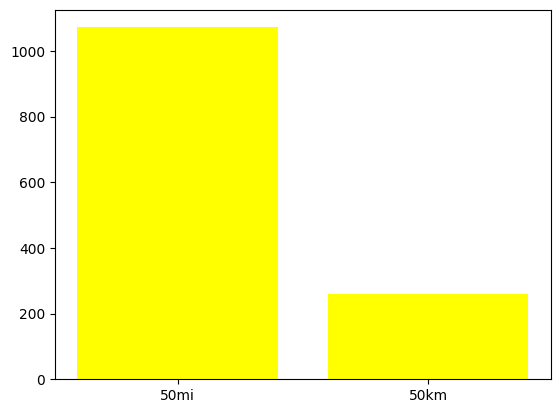

In [ ]:
x = newDf.loc[:,['Event distance/length']][newDf['Event distance/length'].str.lower().str.contains('km')].count()
y = newDf.loc[:,['Event distance/length']][newDf['Event distance/length'].str.lower().str.contains('mi')].count()
plt.bar(newDf['Event distance/length'].unique() , [x[0],y[0]] , color='yellow')
#


(array([ 42., 158., 348., 311., 203., 132.,  70.,  37.,  20.,  10.]),
 array([ 4.085 ,  5.0616,  6.0382,  7.0148,  7.9914,  8.968 ,  9.9446,
        10.9212, 11.8978, 12.8744, 13.851 ]),
 <BarContainer object of 10 artists>)

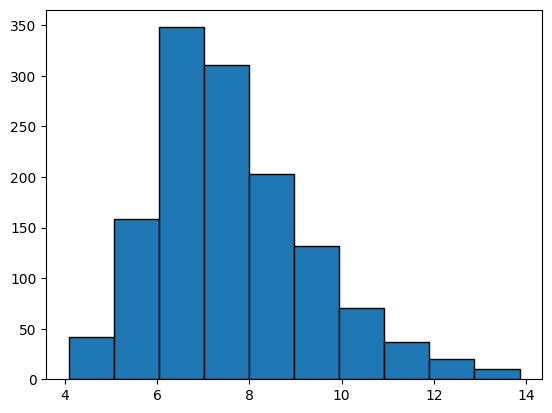

In [ ]:
plt.hist(newDf['Athlete average speed'] , edgecolor='black')

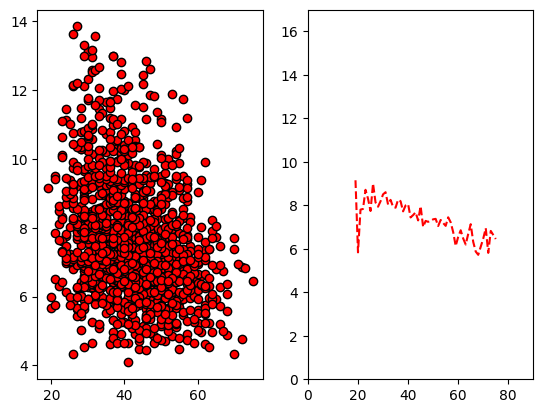

In [ ]:
plt.subplot(1,2,1)
plt.plot(newDf['Athlete age'] , newDf['Athlete average speed'] , marker='o' , mfc='r' , mec='k' , c='w')
plt.subplot(1,2,2)
plt.plot(newDf.groupby('Athlete age')['Athlete average speed'].mean() , 'r--')
plt.axis([0,90,0,17])
print()

<Axes: xlabel='Athlete age', ylabel='Athlete average speed'>

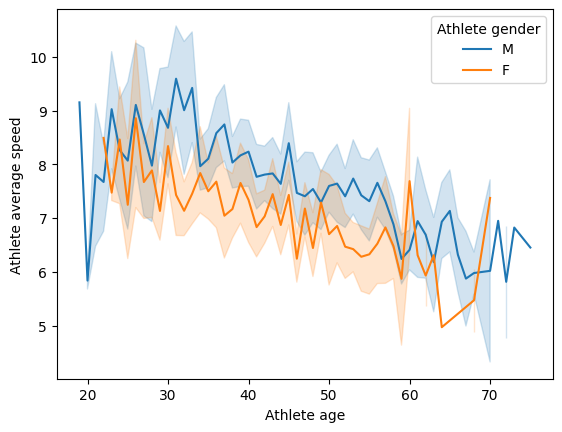

In [ ]:
sns.lineplot(x='Athlete age',y='Athlete average speed',data=newDf, hue='Athlete gender')

<Axes: xlabel='Event dates', ylabel='Event number of finishers'>

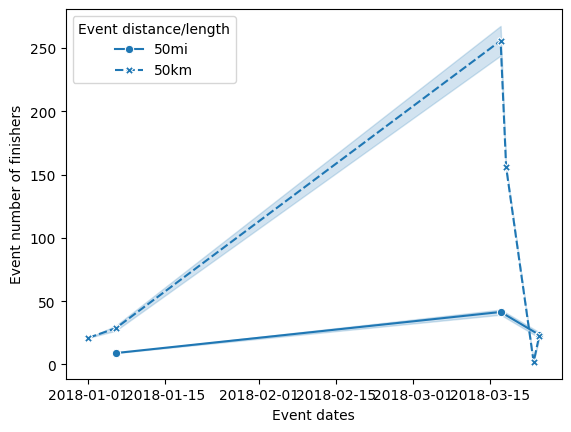

In [ ]:
sns.lineplot(data=newDf , x='Event dates' , y='Event number of finishers' ,  style='Event distance/length'  , markers=True)

<ipython-input-86-dd1132f3cbae>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


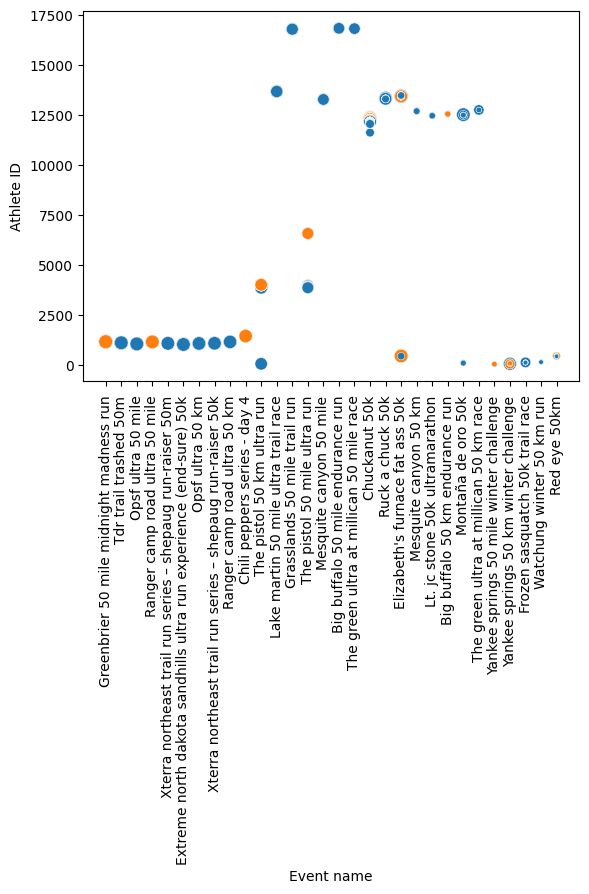

In [ ]:
ax = sns.scatterplot(data=newDf , y='Athlete ID' , x='Event name' , size='Athlete performance', sizes=(10, 100) , legend=None , hue='Athlete gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<ipython-input-107-847c9cfbbca0>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels(i.get_xticklabels(), rotation=90)
<ipython-input-107-847c9cfbbca0>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels(i.get_xticklabels(), rotation=90)


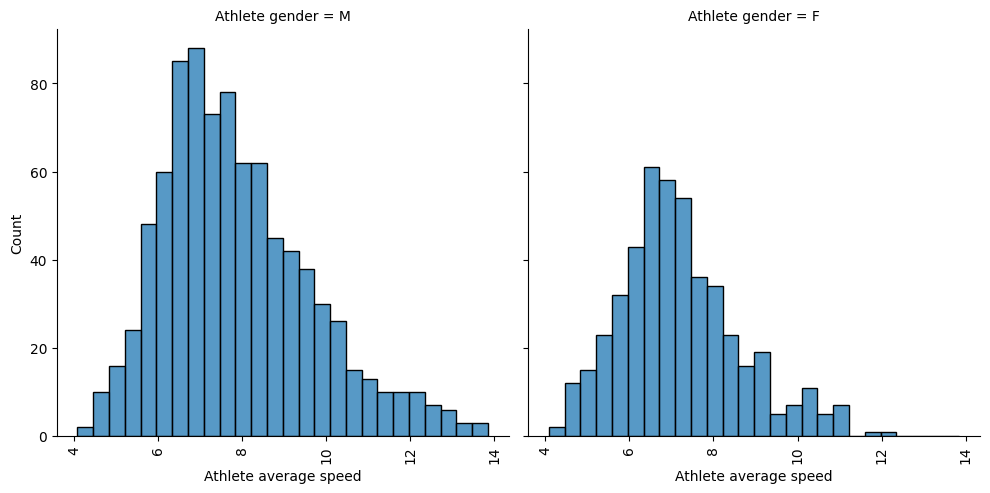

In [ ]:
ax = sns.displot( kind='hist', data=newDf , x='Athlete average speed' , col='Athlete gender' )
for i in ax.axes.flat:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

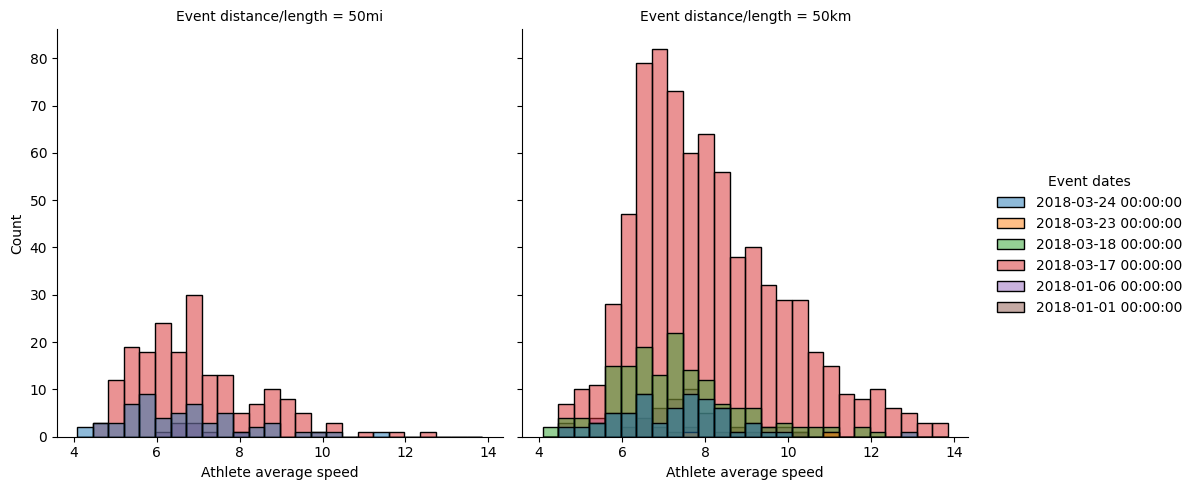

In [ ]:
sns.displot(data=newDf , x='Athlete average speed' , hue='Event dates' , col ='Event distance/length')

<ipython-input-110-ac2d80b3e0df>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels(i.get_xticklabels(), rotation=90)


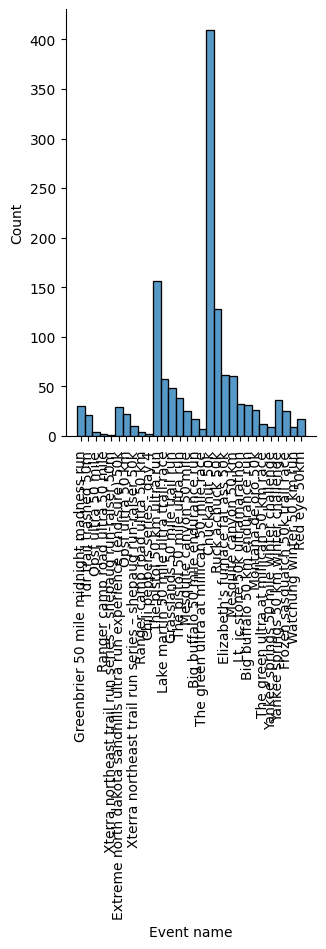

In [ ]:
ax = sns.displot(kind = 'hist' , data=newDf , x='Event name' )
for i in ax.axes.flat:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

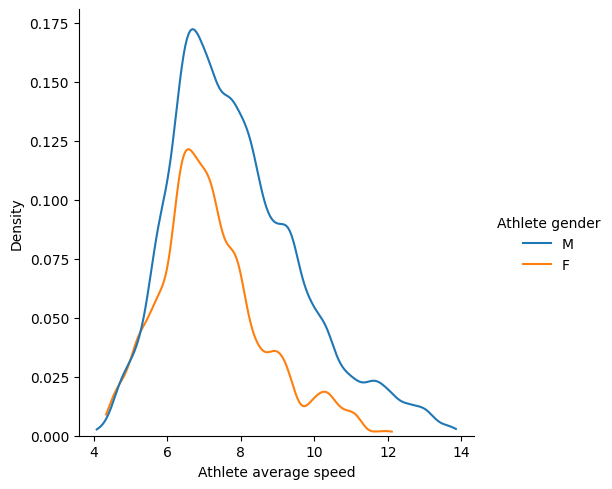

In [ ]:
sns.displot(kind='kde' , data=newDf , x = 'Athlete average speed' , hue='Athlete gender' , bw_adjust=0.5 , cut=0)

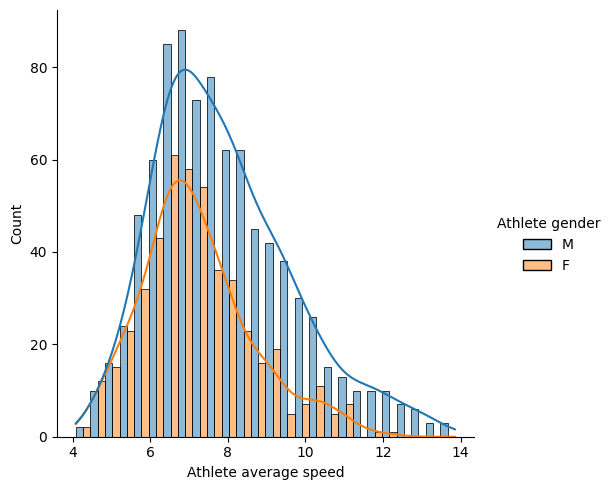

In [ ]:
sns.displot( data=newDf , x = 'Athlete average speed' , hue='Athlete gender' , multiple='dodge' , kde=True)

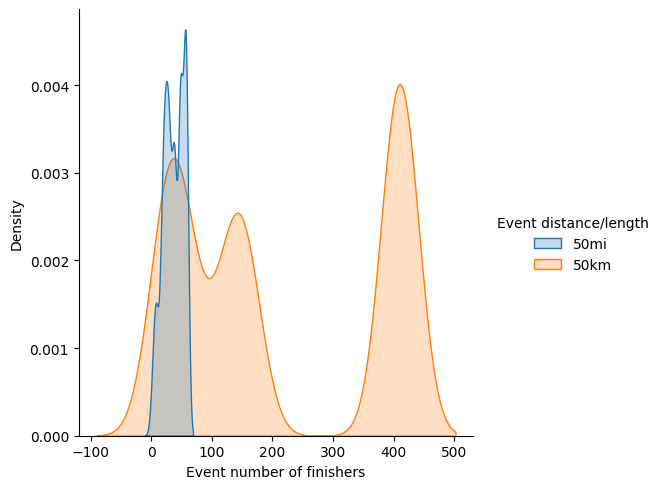

In [ ]:
sns.displot(kind='kde' , data=newDf , x = 'Event number of finishers' , hue='Event distance/length' , bw_adjust=0.75 , fill=True)